In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write)

In [3]:
#kurulumlar
!pip install timm kornia diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00


In [4]:
!pip install firebase_admin

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 46.5 MB/s eta 0:00:00


In [6]:
#TUM VERİ CLASS
class Veri():
  orijinal_goruntu = None
  yolo_goruntu = None
  yolo_goruntu_bilgi = None
  arka_plan_ayrilmis = None
  iyilesitirilmis_goruntu = None
  goruntu_bilgisi = None
  firebase_veri_document_sayisi = None
  urunKategori = None

In [7]:
#FİREBASE İŞLEMLERİ
import time
import firebase_admin
from firebase_admin import credentials, firestore, storage

import cv2
import os
from ultralytics import YOLO

#firebase yapılandır
credentialData = credentials.Certificate("hackathonproject-5e6ef-firebase-adminsdk-mubj0-d18674376c.json")
firebase_admin.initialize_app(credentialData, {
'storageBucket': 'hackathonproject-5e6ef.appspot.com'
})

In [8]:
veri_yol = ("/"+str(time.strftime('%c'))).replace(" ","-")

In [9]:
#bilgileri buluta yükle
def firebase_veri_yukle():

    firestoreDb = firestore.client()
    bucket = storage.bucket()


    #document sayısını öğrenme
    veri_document_sayi = firestoreDb.collection("urunVeri").get()

    #firebase tarih bilgisi
    timestamp = firestore.SERVER_TIMESTAMP

    #veri girişi
    deger = len(veri_document_sayi)+1
    belge_ref = firestoreDb.collection("urunVeri").document("urunBilgi"+str(deger))


    #veriler
    urun_verileri = {
            'ID':str(deger),
            'orijinal_gorsel_adi': "urun_Gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.orijinal_goruntu,
            'arka_plan_ayrilmis_gorsel_adi':"urun_Gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.arka_plan_ayrilmis,
            'iyilesitirilmis_gorsel_adi':"urun_Gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.iyilesitirilmis_goruntu,
            'yolo_gorsel_adi':"urun_Gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.yolo_goruntu,
            'yolo_gorsel_bilgisi':Veri.yolo_goruntu_bilgi,

            'konum':"Yozgat/Boğazlıyan",
            'urun_kategori':Veri.urunKategori,
            'zaman': timestamp,
            "kisaBilgi":Veri.goruntu_bilgisi[0],
            "detayBilgi":Veri.goruntu_bilgisi[1],
            "resimBilgi":Veri.goruntu_bilgisi[2],
            "ilgiCekiciUnsurlar":Veri.goruntu_bilgisi[3],
        }

    #bilgi_upload
    belge_ref.set(urun_verileri, merge=True)

    #gorsel yükleme
    blob = bucket.blob("urun_gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.orijinal_goruntu)
    blob.upload_from_filename(Veri.orijinal_goruntu)

    blob = bucket.blob("urun_gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.yolo_goruntu)
    blob.upload_from_filename(Veri.yolo_goruntu)

    blob = bucket.blob("urun_gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.arka_plan_ayrilmis)
    blob.upload_from_filename(Veri.arka_plan_ayrilmis)

    blob = bucket.blob("urun_gorseller"+str(Veri.firebase_veri_document_sayisi)+veri_yol+Veri.iyilesitirilmis_goruntu)
    blob.upload_from_filename(Veri.iyilesitirilmis_goruntu)




names= {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}


#tahmin için gerekli fonskiyon
def goruntu_Tahmin(goruntu_yol,model):
    results = model([goruntu_yol])
    # Process results list
    for result in results:
        boxes = result.boxes
        print("\n\n\nBAŞLADI")
        print("CLASS BİLGİSİ")
        print(result.boxes.cls)
        print(int(result.boxes.cls[0]))
        print(names[int(result.boxes.cls[0])])
        print("Toplam nesne sayısı : "+str(len(result.boxes.cls)))
        print("CLASS ID BİLGİSİ")
        print(result.boxes.id)
        print("BİTTİ\n\n\n")
        result.save(filename=str(Veri.firebase_veri_document_sayisi)+goruntu_yol)
        Veri.urunKategori = names[int(result.boxes.cls[0])]
        Veri.yolo_goruntu = str(Veri.firebase_veri_document_sayisi)+goruntu_yol
        Veri.yolo_goruntu_bilgi = str(result.boxes)
        Veri.orijinal_goruntu = goruntu_yol



#yolo modeli yükle
def YOLO_islem(gorsel_yolu):
    model = YOLO("yolov8n.pt")
    #tahmin yapma
    goruntu_Tahmin(gorsel_yolu,model)

    #yolları yazdır
    print("Veri yol")
    print(gorsel_yolu)



In [10]:
#ARKA PLAN AYIRMA
from transformers import AutoModelForImageSegmentation
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
torch.set_float32_matmul_precision(["high", "highest"][0])
birefnet = AutoModelForImageSegmentation.from_pretrained(
    "ZhengPeng7/BiRefNet", trust_remote_code=True
)
birefnet.to("cuda")
transform_image = transforms.Compose(
    [
        transforms.Resize((1024, 1024)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

#GORSEL ÖZELLİKLERİNİ DÜZENLEME
#https://huggingface.co/timbrooks/instruct-pix2pix
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)



#GORUNTU BİLGİ ALMA
from transformers import AutoModelForCausalLM, AutoProcessor
from PIL import Image
import torch
model = AutoModelForCausalLM.from_pretrained('ucsahin/TraVisionLM-DPO', trust_remote_code=True)
processor = AutoProcessor.from_pretrained('ucsahin/TraVisionLM-DPO', trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

BiRefNet_config.py:   0%|          | 0.00/298 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- BiRefNet_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


birefnet.py:   0%|          | 0.00/91.3k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- birefnet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/885M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

configuration_travisionlm.py:   0%|          | 0.00/3.46k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ucsahin/TraVisionLM-base:
- configuration_travisionlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_travisionlm.py:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ucsahin/TraVisionLM-base:
- modeling_travisionlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/ucsahin/TraVisionLM-base/6809b320caef3ad10c67a9f182cdbea59ef4c257/configuration_travisionlm.py:81: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

processing_travisionlm.py:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ucsahin/TraVisionLM-DPO:
- processing_travisionlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


preprocessor_config.json:   0%|          | 0.00/510 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/180k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/927k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/585k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

In [11]:
#GORUNTU ARKA PLAN AYIRMA
# verilen image işler
def process(image):
    image_size = image.size
    input_images = transform_image(image).unsqueeze(0).to("cuda")

    with torch.no_grad():
        preds = birefnet(input_images)[-1].sigmoid().cpu()
    pred = preds[0].squeeze()
    pred_pil = transforms.ToPILImage()(pred)
    mask = pred_pil.resize(image_size)
    image.putalpha(mask)
    return image

# Resmi işleyip doğrudan gösteriyoruz.
def arka_plan_ayirma():
    input_image_path = Veri.orijinal_goruntu  # Giriş resminin yolu
    image = Image.open(input_image_path).convert('RGB')
    processed_image = process(image)
    # Sonuçları gösteren yer
    plt.imshow(processed_image)
    plt.axis('off')
    Veri.arka_plan_ayrilmis = Veri.orijinal_goruntu + str(Veri.firebase_veri_document_sayisi)+'.png'  # Çıkış resminin yolu
    plt.savefig(Veri.arka_plan_ayrilmis)
    plt.show()



#GORUNTU IYILESTİRME
def goruntu_acma(deger):
    image = PIL.Image.open(deger)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image

def goruntu_iyilestirme():
  image = goruntu_acma(Veri.arka_plan_ayrilmis)
  prompt = "make the image as real as if it was taken from a color camera"
  images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
  images[0]
  Veri.iyilesitirilmis_goruntu = Veri.arka_plan_ayrilmis +str(Veri.firebase_veri_document_sayisi)+'.png'
  images[0].save(Veri.iyilesitirilmis_goruntu)


#GORUNTU BİLGİ ALMA
def goruntu_bilgisi_alma():
  image = Image.open(Veri.arka_plan_ayrilmis).convert("RGB")

  prompt_list = [
    'Kısaca açıkla',
    'Detaylı açıkla',
    'Resimde ne görünüyor?',
    'Resimde ilgi çekici unsurlar nelerdir?',
  ]

  inputs = processor(text=prompt_list, images=len(prompt_list)*[image], padding="longest", return_tensors="pt")

  # Do not specify device_map or .to("cuda")
  outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.6, top_p=0.9, top_k=50, repetition_penalty=1.2)

  output_text_list = processor.batch_decode(outputs, skip_special_tokens=True)

  for output_text in output_text_list:
    print(f"Model response: {output_text}\n\n\n")

  Veri.goruntu_bilgisi = output_text_list


In [12]:
#ANA KOD
firestoreDb = firestore.client()
bucket = storage.bucket()

#document sayısını öğrenme
veri_document_sayi = firestoreDb.collection("urunVeri").get()

#veri girişi
deger = len(veri_document_sayi)+1
belge_ref = firestoreDb.collection("urunVeri").document("urunBilgi"+str(deger))

Veri.firebase_veri_document_sayisi = deger

YOLO_islem("gorsel.jpg")

100%|██████████| 6.25M/6.25M [00:00<00:00, 328MB/s]



0: 640x480 2 benchs, 45.1ms
Speed: 64.1ms preprocess, 45.1ms inference, 727.4ms postprocess per image at shape (1, 3, 640, 480)



BAŞLADI
CLASS BİLGİSİ
tensor([13., 13.], device='cuda:0')
13
bench
Toplam nesne sayısı : 2
CLASS ID BİLGİSİ
None
BİTTİ



Veri yol
gorsel.jpg


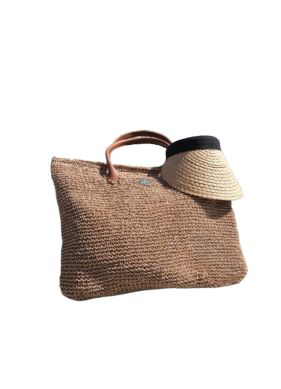

In [13]:
arka_plan_ayirma()

In [14]:
goruntu_iyilestirme()

  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
goruntu_bilgisi_alma()

Model response: Kısaca açıkla
Görselde, doğal bir malzemeden yapılmış şık bir çanta yer almakta. Üzerinde hasır veya benzeri bir malzeme kullanılmış gibi görünüyor ve bu da ona rahat bir görünüm kazandırıyor.



Model response: Detaylı açıkla
Görselde, doğal bir malzemeden yapılmış bir çanta yer almakta. Çanta, ince ve hafif dokulu bir yapıya sahip gibi görünüyor; yüzeyi pürüzsüz ve sıcak bir görünüm sergiliyor. Çantanın üst kısmında, belirgin bir şekilde yerleştirilmiş iki adet aksesuar bulunuyor. Birincisi, yuvarlak bir şapka şeklinde tasarlanmış olan bir tür hasır veya benzeri bir materyalden yapılan parça. Bu parçanın rengi genellikle kahverengi tonlarında ve dış kısmı hafif parlak bir görünüme sahip. Diğer aksesuar ise çantanın yan tarafında, daha kalın bir yapıda yer alıyor. Üst kısımda, çantayı taşımak için kullanılan bu kısım, sade ama şık bir görünüm sunuyor. Genel olarak, bu tasarım hem fonksiyonellik açısından hem de estetik açıdan dikkat çekici bir detay sunmakta. Arka plan

In [16]:
print(Veri.orijinal_goruntu)
print(Veri.yolo_goruntu)
print(Veri.yolo_goruntu_bilgi)
print(Veri.arka_plan_ayrilmis)
print(Veri.iyilesitirilmis_goruntu)
print(Veri.goruntu_bilgisi)
print(Veri.firebase_veri_document_sayisi)
print(Veri.urunKategori)

gorsel.jpg
6gorsel.jpg
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([13., 13.], device='cuda:0')
conf: tensor([0.4807, 0.3034], device='cuda:0')
data: tensor([[8.3651e+01, 2.5833e+02, 5.0620e+02, 6.2221e+02, 4.8071e-01, 1.3000e+01],
        [1.8789e+02, 2.5851e+02, 4.9529e+02, 4.1186e+02, 3.0341e-01, 1.3000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (788, 557)
shape: torch.Size([2, 6])
xywh: tensor([[294.9258, 440.2688, 422.5492, 363.8831],
        [341.5883, 335.1825, 307.3998, 153.3486]], device='cuda:0')
xywhn: tensor([[0.5295, 0.5587, 0.7586, 0.4618],
        [0.6133, 0.4254, 0.5519, 0.1946]], device='cuda:0')
xyxy: tensor([[ 83.6512, 258.3272, 506.2004, 622.2104],
        [187.8884, 258.5082, 495.2882, 411.8568]], device='cuda:0')
xyxyn: tensor([[0.1502, 0.3278, 0.9088, 0.7896],
        [0.3373, 0.3281, 0.8892, 0.5227]], device='cuda:0')
gorsel.jpg6.png
gorsel.jpg6.png6.png
['Kısaca açıkla\nGörselde, doğal bir malzemeden yapılmış şık bir 

In [17]:
firebase_veri_yukle()